In [14]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt

In [2]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t")
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t")

### June scatter plot

We see on the scatter plot for june that there are clusters on the political topic clored in blue. This would indicate that the users who belong there are labelled as liberals by the model. 

However, the same people are labelled as against abortion OR gay marriages OR both. We want to investigate whether the labels are correct and if yes - then we can conclude that using both UMAP components is the only way to find people with views on certain topics that conflict with their self-reported political views.

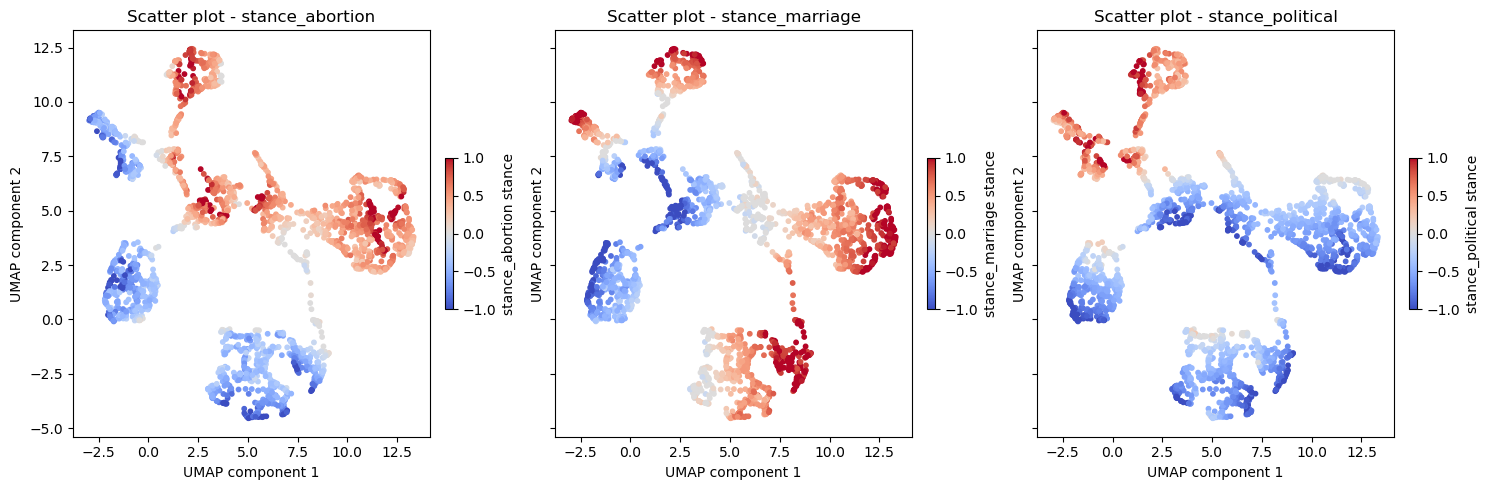

In [3]:
rfun.plot_c_subplot2D(june_df, "umap_component1", "umap_component2", ["stance_abortion", "stance_marriage", "stance_political"])

In [4]:
#first investigate cluster on the bottom of the scatterplot, where liberals are against gay marriage, but not abortion
#coordinates: umap1 in [2.5, 9.5], umap2 in [-5, 0]
against_marriage_libs = june_df["user"][(june_df["umap_component1"]>=6.0) & (june_df["umap_component1"]<=9.5) & (june_df["umap_component2"]>=-4.0) & (june_df["umap_component2"]<=0.0)]

In [5]:
#Now we want to check their messages on the 3 topics
messages_june = pd.read_csv("../output_network/network_users_combined_allcolumns_june.csv", sep = "\t")
against_marriage_libs

0        -AmberSweet-
17          246011111
25            42lines
30      6Uncle6James6
32          7daykatie
            ...      
2437      tricky_trig
2448    twelve_azalea
2462        vankorgan
2467        voidmusik
2509     zetsubousugi
Name: user, Length: 261, dtype: object

In [6]:
messages_june[["text", "topic"]][messages_june["user"]=="vankorgan"]

,text,topic
228,"""That's the first time I've ever heard the Cat...",1
2328,"I'm confused, is that a gay man who was cited ...",12
2444,"""There's a pretty big difference that makes an...",12
2473,""" It feels like maybe you didn't actually read...",12
2484,""" I think it seems like it would be on you to ...",12
3871,I wouldn't be so sure about that. [It's pretty...,1
4127,Yeah. The entire Mises takeover has really bum...,1
5399,So it has nothing to do with the actual conten...,12
6354,That is absolutely not what people were concer...,12
9676,""" I happen to fall more on the libertarian sid...",1


Results from manually observed messages: 

- User 0 -AmberSweet- is not actually against marriage. Messages are out of context, so should be labelled neutral; definitely not homophobic, but talks about a person that is, so keyword is mentioned. Maybe this confused Llama. Is indeed liberal and pro choice.
- User 25 42lines is slightly conservative, not enough context to decide if against marriage or abortion.
- User 2448 twelve_azalea is pro-marriage (maybe), political afficliation unknown, pro-choice.
- User voidmusik is pro-choice, liberal and probably pro-marriage.
- User vankorgan: some of his messages are not for the marriage topic, but more general LGBTQ discussions. They support LGBTQ rights. They are libertarian (not anarchist!) and dislike Republicans. Are pro-choice

In [ ]:
#second: investigate cluster in the middle of the scatterplot, where perceived liberals are against abortion, but not gay marriage
#coordinates: umap1 in [1.25, 4.0], umap2 in [4.0, 6.25]
against_abortion_libs = june_df["user"][(june_df["umap_component1"]>=1.25) & (june_df["umap_component1"]<=4.0) & (june_df["umap_component2"]>=4.0) & (june_df["umap_component2"]<=6.25)]

In [8]:
against_abortion_libs

4            -_Duke_-_-
6               0m4ll3y
10          1500minus12
42           ALargeRock
43                APAG-
             ...       
2403    thesaddestpanda
2440    trippingfingers
2451        tysonmaniac
2503           yo2sense
2510          ziggurter
Name: user, Length: 175, dtype: object

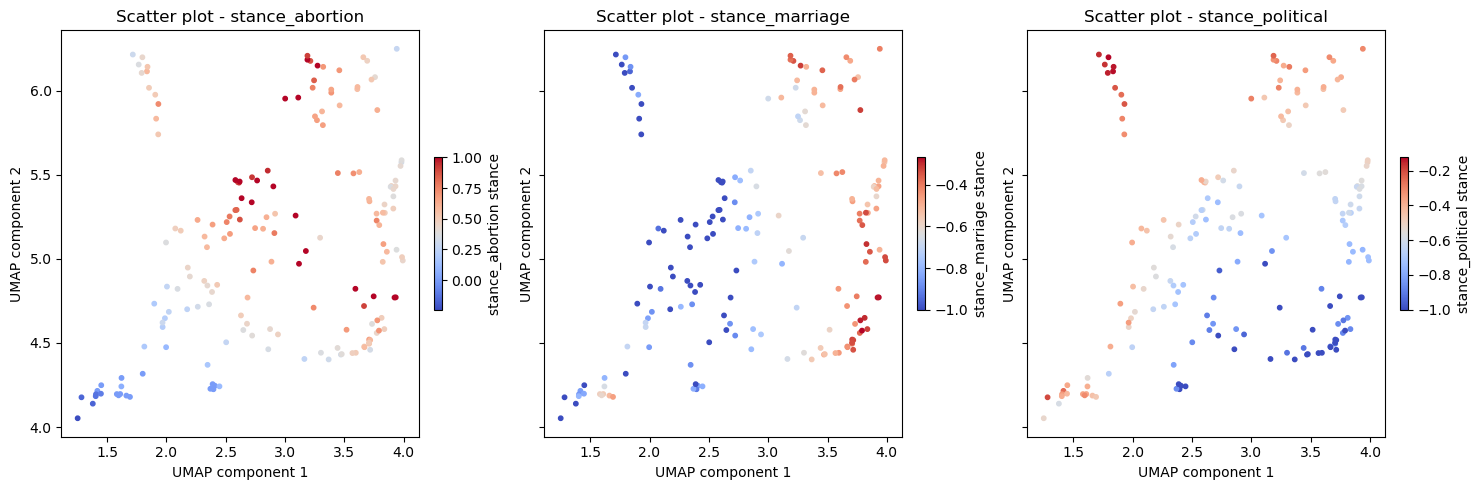

In [9]:
filtered_df = june_df[june_df['user'].isin(against_abortion_libs)]
rfun.plot_c_subplot2D(filtered_df, "umap_component1", "umap_component2", ["stance_abortion", "stance_marriage", "stance_political"])

In [15]:
#new plotting function to add names
def plot_named_scatters_2D(merged_df, pc_column1, pc_column2, color_topics):
    """Function to make a subplot of scatterplots for all reduced component in 2D,
      colored by stances on each of the 3 topics
      
      color_topics: list of column names (strings) where the stances are -> ["stance_abortion", "stance_marriage", "stance_political"]
    """
    num_plots = len(color_topics)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)
 
    if num_plots == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one plot
 
    for i, (color_topics, ax) in enumerate(zip(color_topics, axes)):
        num_users = merged_df.shape[0]
 
        scatter = ax.scatter(merged_df[pc_column1], merged_df[pc_column2], c=merged_df[color_topics], cmap='coolwarm', s=10)
        cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label(f'{color_topics} stance')

        #labels for each point
        for _, row in merged_df.iterrows():
            ax.text(
                row[pc_column1],
                row[pc_column2],
                str(row['user']),
                fontsize=6,
                alpha=0.7
            )
 
        ax.set_xlabel('UMAP component 1' if pc_column1 == "umap_component1" else 'Principal component 1')
        ax.set_ylabel('UMAP component 2' if pc_column2 == "umap_component2" else 'Principal component 2')
        ax.set_title(f'Scatter plot - {color_topics}')
 
    plt.tight_layout()
    plt.show()

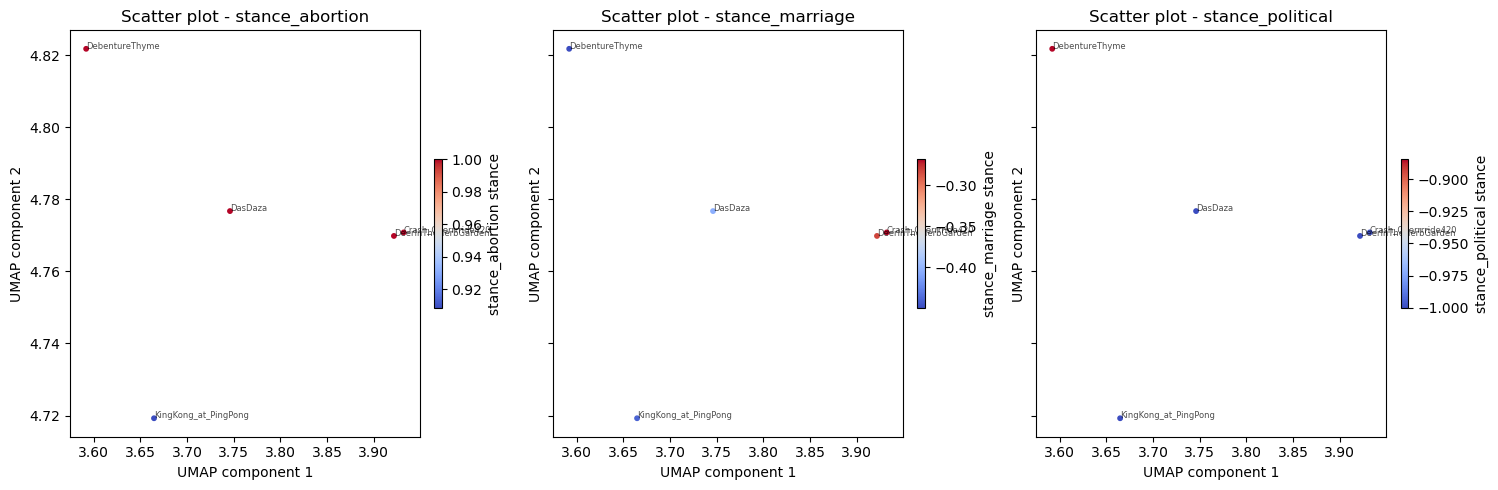

In [19]:
# zooming up even closer to get the names of certain individuals: umap1 in [3.5, 4.0] umap2 in [4.7, 4.9]
certain_against_abortion_libs = june_df["user"][(june_df["umap_component1"]>=3.5) & (june_df["umap_component1"]<=4.0) & (june_df["umap_component2"]>=4.7) & (june_df["umap_component2"]<=4.9)]
filtered_df = june_df[june_df['user'].isin(certain_against_abortion_libs)]
plot_named_scatters_2D(filtered_df, "umap_component1", "umap_component2", ["stance_abortion", "stance_marriage", "stance_political"])

In [13]:
certain_against_abortion_libs

335     Crash_Overrrride420
380                 DasDaza
384          DebentureThyme
389     DeerInTheHerbGarden
814    KingKong_at_PingPong
Name: user, dtype: object

In [31]:
for index, row in messages_june[["text", "topic"]][messages_june["user"]=="Crash_Overrrride420"].iterrows():
    print(row["text"])
print("#####################")
for index, row in messages_june[["text", "topic"]][messages_june["user"]=="DeerInTheHerbGarden"].iterrows():
    print(row["text"])
print("#####################")
for index, row in messages_june[["text", "topic"]][messages_june["user"]=="DasDaza"].iterrows():
    print(row["text"])

Your claim is that the government isn’t allowing boys to be born or maybe killing male babies?
Yeah but if you read the rest it would seem they are calling out people that say things like they  like the culture wars but then turn around and say something about pride month. I don’t think they is meant to be an anti gay post.
No these people all think this is a right wing hang out for some reason
#####################
"Yeah its frustrating to see so much infighting in the LGBT community all the while the auths are returning to the classic ""gay people are threats to children"" propaganda and getting away with it"
A bisexual person is always bisexual regardless if they are currently dating a man or a woman. They are bisexual 100/100th time
Because its LGBT. Bisexual people don't just swap between being gay and being straight. They are always bisexual.   If you like vanilla and strawberry ice-cream, just because you only eat strawberry ice cream for a week doesn't mean you no longer like v

- User Crash_Overrrride420 doesn't have enough meaningful messages to decide his stance
- User DeerInTheHerbGarden is indeed liberal and supports LGBT rights, but his stance on abortion is a bit vague, but hints as being pro-choice. Maybe mislabelled due to lack of context 
- User DasDaza

### December scatter plot

We do the same here

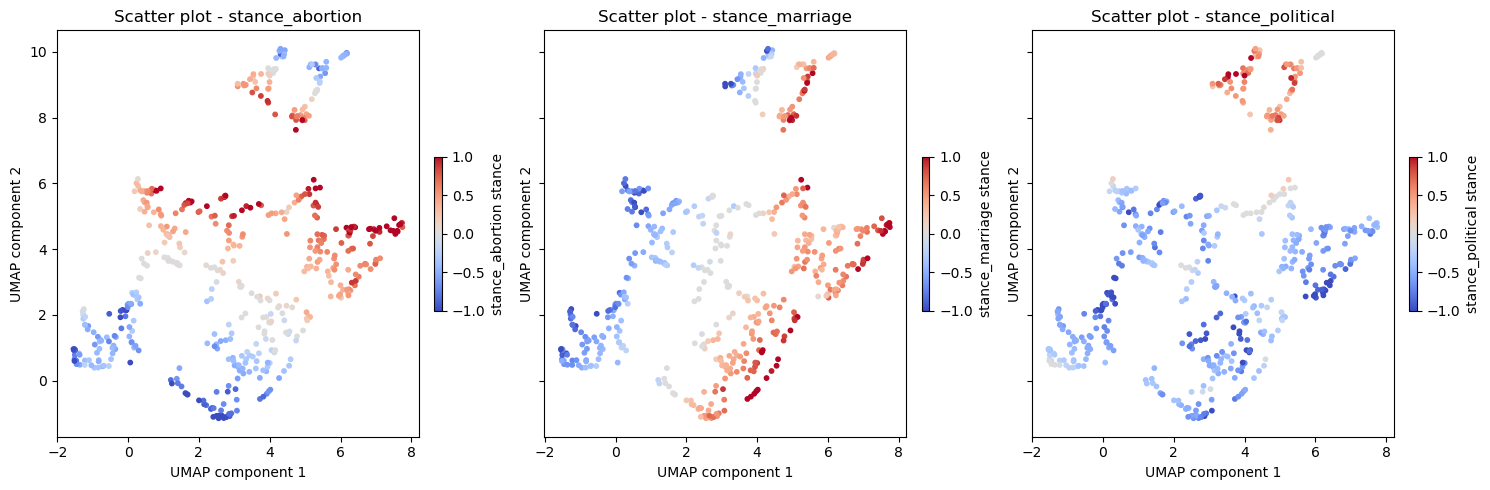

In [11]:
rfun.plot_c_subplot2D(dec_df, "umap_component1", "umap_component2", ["stance_abortion", "stance_marriage", "stance_political"])